# Rede neural simples

Esse eh um exemplo de classificacao em que os dados sao separaveis linearmente

importar modulos:

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline 

define um dominio e preenche compontos rotulados como 1 de uma lado de uma reta definita por A e B e 0 do outro lado

In [3]:
NPOINTS=500
BOXSIZE=30.
NOISE=0.05

B=np.array([5, 5])
A=np.array([-1, 2])

In [4]:
X=(np.random.rand(NPOINTS,2)*BOXSIZE - (BOXSIZE/2.0)).astype(np.float32)

In [5]:
y=(np.dot((X-B), A) > 0.0).astype(float)

Plota:

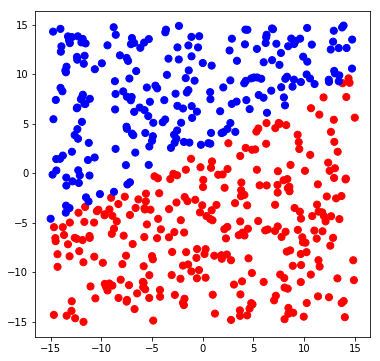

In [6]:
colormap=np.array(['r', 'b'])
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X.T[0], X.T[1], s=50, c=colormap[y.astype(int)])

Adicionar ruido para tornar as coisas um pouco mais interessantes:

In [7]:
flipy=np.random.binomial(1,NOISE,len(y))

In [8]:
y=np.logical_xor(y, flipy).astype(float)

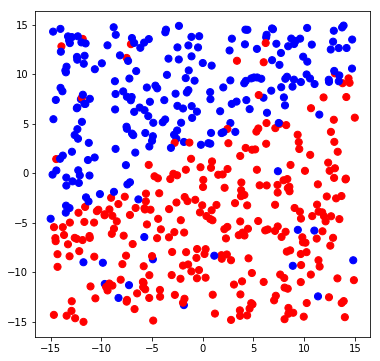

In [9]:
colormap=np.array(['r', 'b'])
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X.T[0], X.T[1], s=50, c=colormap[y.astype(int)])

Aqui comeca a definicao do modelo em Tensorflow:

In [10]:
Xtf=tf.placeholder(tf.float32)
ytf=tf.placeholder(tf.float32)

Por que inicializar com valores diferentes de zero?

In [11]:
weights1 = tf.Variable(tf.truncated_normal([2, 1]))
biases1 = tf.Variable(tf.zeros([1]))

In [12]:
AX=tf.matmul(Xtf, weights1) + biases1

In [13]:
yhat=tf.sigmoid(AX)

In [14]:
cost=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=ytf, logits=AX))

In [15]:
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [16]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [17]:
for i in range(10000):
    sess.run([cost, optimizer], feed_dict={Xtf : X, ytf: y.reshape((-1,1))})

In [18]:
x = np.arange(-15,15,0.5)
y = np.arange(-15,15,0.5)
x,y=np.meshgrid(x,y)
test=np.array(zip(np.reshape(x, -1), np.reshape(y, -1))).astype(np.float32)

In [19]:
testy=sess.run([yhat], feed_dict={Xtf: test})

In [20]:
Z=np.reshape((testy[0].reshape(-1) > 0.5).astype(float), np.shape(x))

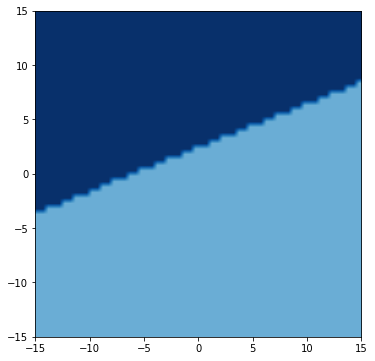

In [21]:
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(6, 6))
im = plt.imshow(Z, interpolation='bilinear', cmap=cm.Blues,
                origin='lower', extent=[-15, 15, -15, 15],
                vmax=abs(Z).max(), vmin=-abs(Z).max())